In [1]:
import pandas as pd
import numpy as np

In [7]:
close_px_all = pd.read_csv('../examples/stock_px_2.csv',
        parse_dates=True, index_col=0)

close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

# business day resample (up)
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future ver

<Axes: >

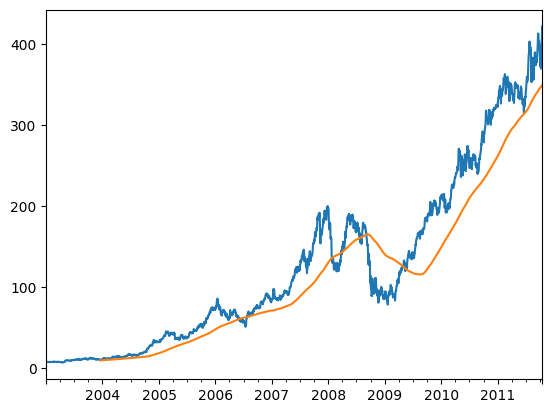

In [8]:
# sliding window with rolling() like groupby and resamplebut needs non NA in window
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [14]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std() #minper didnt really do
appl_std250

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    25.430104
2011-10-11    25.523131
2011-10-12    25.624851
2011-10-13    25.758644
2011-10-14    25.993449
Freq: B, Name: AAPL, Length: 2292, dtype: float64

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future ver

<Axes: >

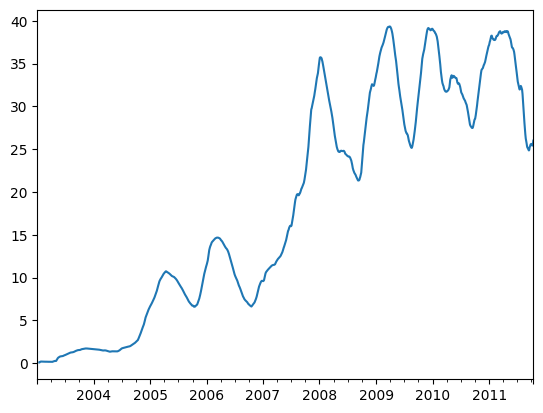

In [15]:
appl_std250.plot()

In [16]:
# Expanding window from size 1 to len(series)
expanding_mean = appl_std250.expanding().mean()
expanding_mean

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    18.521201
2011-10-11    18.524272
2011-10-12    18.527385
2011-10-13    18.530554
2011-10-14    18.533823
Freq: B, Name: AAPL, Length: 2292, dtype: float64

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in

<Axes: >

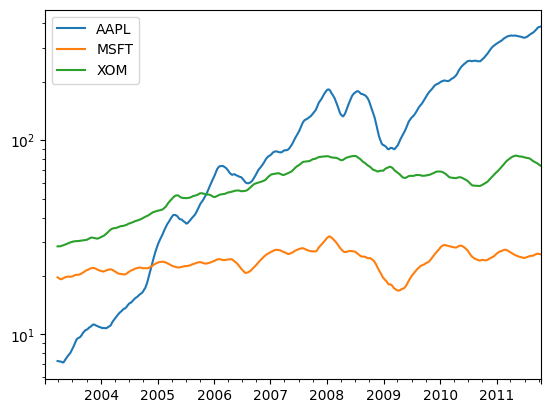

In [20]:
# on DF it applies on all cols
close_px.rolling(60).mean().plot(logy=True)


In [21]:
# 20D rolling period
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000
